<a href="https://colab.research.google.com/github/juanpimedicen/Challenge-AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda3.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175


#1. Análisis de facturación



In [2]:
# ver los nombres de las columndas del archivo en ulr1
tienda1 = pd.read_csv(url1)
tienda1.columns

# crear una lista de tiendas para guardar los dataframes
tiendas = [tienda1, tienda2, tienda3, tienda4]

In [3]:
#función que quite las mayúsculas de los nombres de las columnas de tienda1, tienda2, tienda3 y tienda4

def lower_columns(df):
  df.columns = [col.lower() for col in df.columns]
  return df

for tienda in tiendas:
  lower_columns(tienda)

tienda3.columns

Index(['producto', 'categoría del producto', 'precio', 'costo de envío',
       'fecha de compra', 'vendedor', 'lugar de compra', 'calificación',
       'método de pago', 'cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

# 2. Ventas por categoría

In [4]:
i=1
print(f"Ingreso totales por tienda:")
# ciclo para buscar entre cada tienda de la lista tiendas
for tienda in tiendas:
  # calcular la suma de cada tienda
  suma_precio = tienda['precio'].sum()

  # imprimir la suma de cada tienda
  print(f"Tienda {i}: ${suma_precio:,.2f}")
  i=i+1



Ingreso totales por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


In [5]:
# Función que calcule y muestre las categorías ordenándolas desde la más vendida en cada tienda
def top_categories_per_store(stores, n):  # n es el número de categorías a mostrar
    for i, tienda in enumerate(stores):
        print(f"\nTop {n} categorias para la Tienda {i+1}:")
        # calcular el conteo por categoría
        category_counts = tienda['categoría del producto'].value_counts().reset_index()
        category_counts.columns = ['Categoría del Producto', 'Ventas']

        # se muestra el top n
        print(category_counts.head(n))

# Se aplica la funcion a la lista "tiendas" y se puede cambiar el número de categorías a mostrar
top_categories_per_store(tiendas,5)



Top 5 categorias para la Tienda 1:
  Categoría del Producto  Ventas
0                Muebles     465
1           Electrónicos     448
2               Juguetes     324
3      Electrodomésticos     312
4   Deportes y diversión     284

Top 5 categorias para la Tienda 2:
  Categoría del Producto  Ventas
0                Muebles     442
1           Electrónicos     422
2               Juguetes     313
3      Electrodomésticos     305
4   Deportes y diversión     275

Top 5 categorias para la Tienda 3:
  Categoría del Producto  Ventas
0                Muebles     499
1           Electrónicos     451
2               Juguetes     315
3      Electrodomésticos     278
4   Deportes y diversión     277

Top 5 categorias para la Tienda 4:
  Categoría del Producto  Ventas
0                Muebles     480
1           Electrónicos     451
2               Juguetes     338
3   Deportes y diversión     277
4      Electrodomésticos     254


# 3. Calificación promedio de la tienda


In [37]:
# ciclo que calcula las calificaciones promedio de los clientes para cada tienda.
calificaciones=[]

for i, tienda in enumerate(tiendas):
    # Manejar posibles errores si la columna 'calificación' no tiene valores no numéricos
    try:
        average_rating = tienda['calificación'].mean()
        calificaciones.append((i + 1, average_rating))
    except TypeError:
        print(f"La columna 'calificación' de la Tienda {i+1} contiene valores no numéricos.")

# Ordenar por calificación promedio (descendente)
calificaciones_ordenadas = sorted(calificaciones, key=lambda x: x[1], reverse=True)

# Imprimir resultados ordenados
print("Calificaciones promedio por Tienda (DESC):")
for tienda_id, promedio in calificaciones_ordenadas:
    print(f"Tienda {tienda_id}: {promedio:.2f}")

Calificaciones promedio por Tienda (DESC):
Tienda 3: 4.05
Tienda 2: 4.04
Tienda 4: 4.00
Tienda 1: 3.98


# 4. Productos más y menos vendidos


Tienda 1:
Top productos más vendidos:
           Producto  Cantidad
0        Microondas        60
1     TV LED UHD 4K        60
2           Armario        60
3  Secadora de ropa        58
4     Mesa de noche        56

Tienda 2:
Top productos más vendidos:
                    Producto  Cantidad
0  Iniciando en programación        65
1                 Microondas        62
2                    Batería        61
3          Guitarra acústica        58
4                  Pandereta        58

Tienda 3:
Top productos más vendidos:
          Producto  Cantidad
0    Kit de bancas        57
1  Mesa de comedor        56
2        Cama king        56
3     Set de ollas        55
4    Mesa de noche        55

Tienda 4:
Top productos más vendidos:
                    Producto  Cantidad
0                   Cama box        62
1                 Cubertería        59
2    Dashboards con Power BI        56
3                  Cama king        56
4  Carrito de control remoto        55


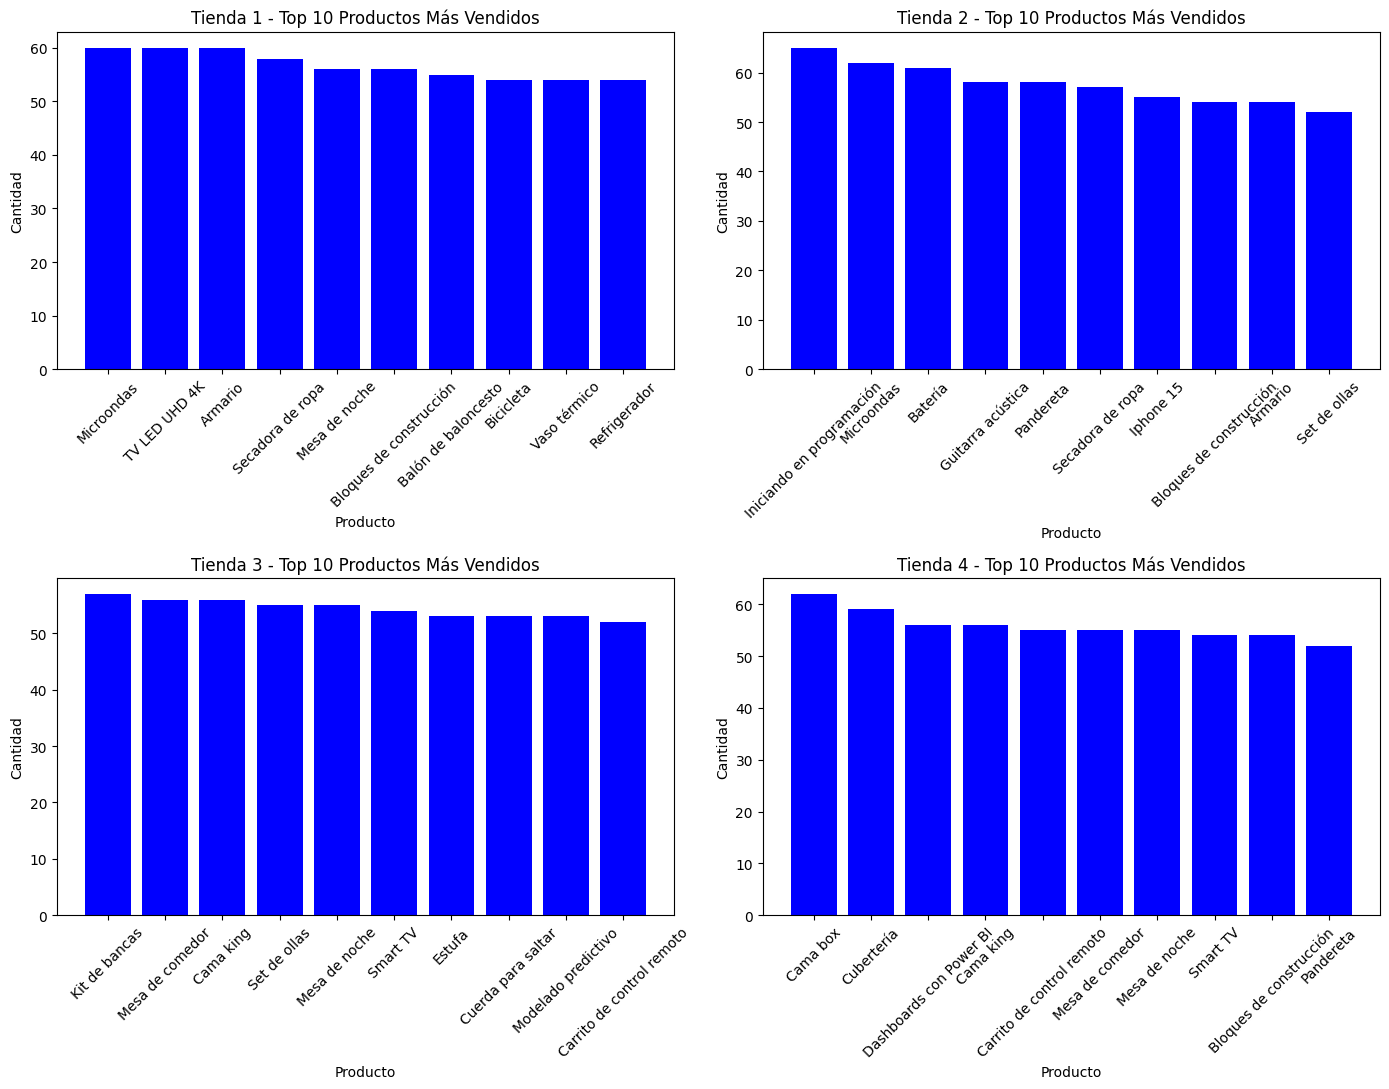

In [15]:
import matplotlib.pyplot as plt

def analyze_product_sales(stores):
    num_tiendas = len(stores)

    fig, axes = plt.subplots(2, 2, figsize=(14, 11)) #Se hace un unico grafico compuesto con subplot con las 4 tiendas.
    axes = axes.flatten()  # Facilita el acceso a cada eje

    for i, store in enumerate(stores):
        product_sales = store['producto'].value_counts().reset_index()
        product_sales.columns = ['Producto', 'Cantidad']

        # Ordenar para obtener top 5 y 10 productos
        top_5products = product_sales.sort_values(by='Cantidad', ascending=False).head(5)
        top_10products = product_sales.sort_values(by='Cantidad', ascending=False).head(10)

        # Imprimir en consola el top 5 productos
        print(f"\nTienda {i+1}:")
        print("Top productos más vendidos:")
        print(top_5products)

        # Crear el gráfico en su subplot para top 10 productos
        axes[i].bar(top_10products['Producto'], top_10products['Cantidad'], color='blue')
        axes[i].set_title(f'Tienda {i+1} - Top 10 Productos Más Vendidos')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylabel('Cantidad')
        axes[i].set_xlabel('Producto')

    plt.tight_layout()
    plt.show()


analyze_product_sales(tiendas)


# 5. Envío promedio por tienda

In [27]:
print("Costo de Envío promedio por Tienda:")
for i, tienda in enumerate(tiendas):
    # Manejar posibles errores si la columna 'costo de envío' no tiene valores no numéricos
    try:
        average_shipping = tienda['costo de envío'].mean()
        print(f"Tienda {i+1}: ${average_shipping:,.2f}")
    except TypeError:
        print(f"La columna 'costo de Envío' de la Tienda {i+1} contiene valores no numéricos.")



Costo de Envío promedio por Tienda:
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


# Informe Final de Evaluación de Tiendas  
## Recomendación para el Sr. João sobre cuál tienda vender

## Introducción

El presente informe tiene como objetivo principal evaluar el desempeño de las cuatro tiendas del Sr. João con el fin de determinar cuál de ellas representa una mejor opción para ser vendida. Para ello, se han analizado y comparado diversos indicadores clave:

- Ingresos totales  
- Categorías de productos más y menos vendidas  
- Calificaciones promedio de los clientes  
- Productos más y menos vendidos  
- Coste de envío promedio por tienda

A partir del análisis de estos datos y las visualizaciones generadas, se propone una recomendación clara, objetiva y justificada.

## Desarrollo del Análisis

### 1. Ingresos Totales

Los ingresos son un reflejo del rendimiento financiero de cada tienda:

- Tienda 1: \$1,150,880,400.00  
- Tienda 2: \$1,116,343,500.00  
- Tienda 3: \$1,098,019,600.00  
- Tienda 4: \$1,038,375,700.00

**Observación:** La Tienda 1 tiene los ingresos más altos, aunque esto no necesariamente indica un desempeño óptimo.

### 2. Categorías de Productos Más Vendidas

En todas las tiendas, la categoría con más ventas es:

- Muebles  
  - Tienda 1: 465 ventas  
  - Tienda 2: 442 ventas  
  - Tienda 3: 499 ventas  
  - Tienda 4: 480 ventas

Esto sugiere que los muebles son un producto clave en la estrategia de ventas del negocio.

### 3. Calificaciones Promedio de Clientes

La satisfacción del cliente es esencial para la sostenibilidad del negocio:

1. Tienda 3: 4.05
2. Tienda 2: 4.04
3. Tienda 4: 4.00
4. Tienda 1: 3.98

**Análisis:** La Tienda 1 tiene la menor calificación, lo cual puede reflejar problemas en la atención, calidad del producto o experiencia de compra.

### 4. Productos Más y Menos Vendidos

Productos más vendidos por tienda:

- Tienda 1: Microondas, TV LED UHD 4K, Armario  
- Tienda 2: Iniciando en programación, Microondas, Batería  
- Tienda 3: Kit de bancas, Mesa de comedor, Cama king  
- Tienda 4: Cama box, Cubertería, Dashboards con Power BI

Cada tienda también presenta productos con muy bajas ventas, lo cual representa oportunidades de mejora en promoción o selección de inventario.

En los gráficos generados se visualizaron los Top 10 productos más vendidos por tienda, lo que permitió comparar de forma clara el comportamiento de ventas.

### 5. Costo Promedio de Envío

El costo de envío afecta directamente la experiencia del cliente:

- Tienda 1: \$26,018.61  
- Tienda 2: \$25,216.24  
- Tienda 3: \$24,805.68  
- Tienda 4: \$23,459.46

**Observación:** La Tienda 1 tiene el mayor costo de envío, lo cual podría estar afectando negativamente la conversión de ventas o la percepción de valor por parte del cliente.

## Conclusión y Recomendación

Tras analizar todos los factores, se concluye que:

- La Tienda 1, a pesar de tener los ingresos más altos, presenta la peor calificación de clientes y el mayor costo de envío.  
- La Tienda 3 muestra un balance sólido entre satisfacción del cliente, variedad de productos vendidos y eficiencia operativa.  
- La Tienda 4, aunque con menores ingresos, tiene el envío más económico, lo cual puede ser atractivo si se fortalecen otras áreas.

### Recomendación Final:

El Sr. João debería considerar vender la Tienda 1, ya que sus debilidades (satisfacción baja y altos costos operativos) podrían comprometer su rentabilidad futura, a pesar de sus ingresos actuales.

Conservar las tiendas con mejor percepción del cliente y menor carga operativa permitirá construir una base sólida y rentable para el futuro del negocio.


In [ ]:
# prompt: Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.
# Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.
# Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.
# Sugerencias:
# Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.
# Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

import pandas as pd
import matplotlib.pyplot as plt
import folium # Install this library: !pip install folium

# ... (Your existing code for data loading and preprocessing) ...

# Assuming your dataframes (tienda1, tienda2, tienda3, tienda4)
# have columns named 'latitud', 'longitud', and 'precio'

def visualize_sales_distribution(stores):
    for i, store in enumerate(stores):
        # Create a map centered on the mean latitude and longitude
        mean_lat = store['latitud'].mean()
        mean_lon = store['longitud'].mean()
        my_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)


        # Add markers for each store location, with size proportional to sales
        for index, row in store.iterrows():
          folium.CircleMarker(
              location=[row['latitud'], row['longitud']],
              radius=row['precio'] / 10000000,  # Adjust scaling as needed
              color='blue',
              fill=True,
              fill_color='blue',
              popup=f"Precio: ${row['precio']:,.2f}"
          ).add_to(my_map)


        # Display the map
        display(my_map)

visualize_sales_distribution(tiendas)

# Further analysis and visualization examples

def analyze_geographic_impact(store):
  # Scatter plot of sales vs. latitude/longitude
  plt.figure(figsize=(10, 6))
  plt.scatter(store['longitud'], store['latitud'], s=store['precio'] / 1000000, alpha=0.6) # Ajusta el scaling del tamaño
  plt.xlabel('Longitud')
  plt.ylabel('Latitud')
  plt.title('Distribución geográfica de las ventas')
  plt.colorbar(label='Precio')
  plt.show()

# Example usage:
analyze_geographic_impact(tienda1)

# You can repeat this for the other stores
# and create combined visualizations or other
# advanced visualizations to further explore
# geographical correlations and patterns.

